In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

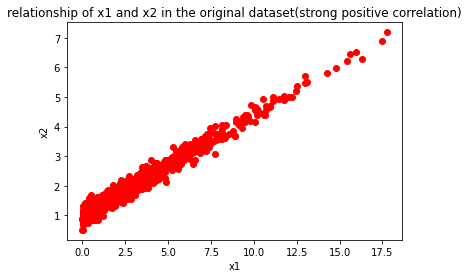

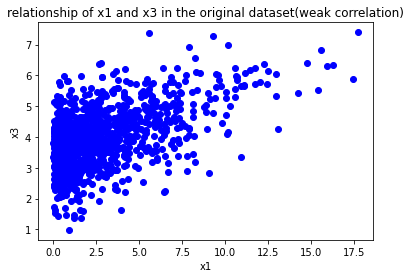

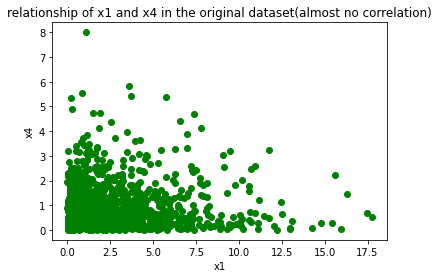

In [48]:
# to test whether PCA is feasible for other distributions, like exponential distribution

# generate the original dataset
# x1, x2, x3, x4 follow multivariate exponential distribution
# but because python do not have a function like multivariate normal distribution, 
# I assume that x2 is almost the same as x1 (strong positive correlation),
# x3 is similar to x1(weak correlation),
# x4 is not correlated with other variables
mean = np.array([3.0, 2.0, 4.0, 1.0])
conv = np.array([
    [1.0, 0.9, 0.2, 0.0],
    [0.9, 1.0, 0.2, 0.0],
    [0.2, 0.2, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
])
x1 = np.random.exponential(scale=mean[0], size=(1, 1000))
rand = np.random.randn(1000) # generate random numbers first
rand = rand*np.sqrt(1 - 0.9 ** 2)
x2 = 0.9 * x1 + rand # based on the correlation, generate x2
x2 = 2 + np.sqrt(1) * (x2 - np.mean(x2)) / np.std(x2) # adjust the mean and varianve
rand = np.random.randn(1000)
rand = rand*np.sqrt(1 - 0.2 ** 2)
x3 = 0.2 * x1 + rand
x3 = 4 + np.sqrt(1) * (x3 - np.mean(x3)) / np.std(x3)
x4 = np.random.exponential(scale=mean[3], size=(1, 1000))

# ploy the original dataset
plt.plot(x1, x2, 'ro')
plt.title("relationship of x1 and x2 in the original dataset(strong correlation)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
plt.plot(x1, x3, 'bo')
plt.title("relationship of x1 and x3 in the original dataset(weak correlation)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.show()
plt.plot(x1, x4, 'go')
plt.title("relationship of x1 and x4 in the original dataset(almost no correlation)")
plt.xlabel("x1")
plt.ylabel("x4")
plt.show()

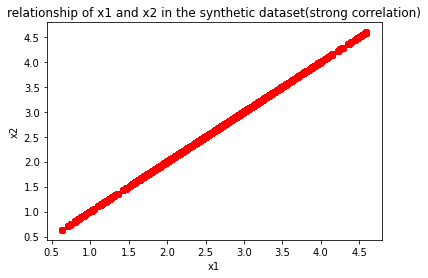

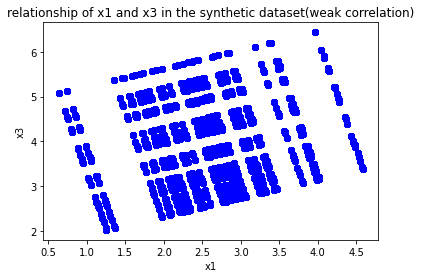

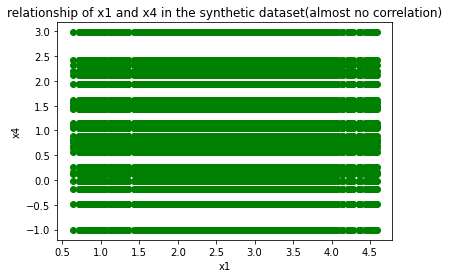

In [58]:
# use PCA to generate a synthetic dataset with 3 new features

# get eigenvalues and eigenvectors
l, v = np.linalg.eig(conv)

# calculate the largest three eigenvalues and transformation matrix
max_index = np.argpartition(l,-3)[-3:]
matrix = np.zeros((4,3))
for i in range(2,-1,-1):
    matrix[:,2-i] = v[:,max_index[i]]

# calculate new mean and variance
nmean = np.dot(mean, matrix)
var = np.zeros(4)
for i in range(0,4):
    var[i]=conv[i,i]
nvar = np.dot(var, matrix*matrix)
k = np.sqrt(nvar)

# sample for the new features
s0 = np.random.normal(nmean[0], k[0], 30)
s1 = np.random.normal(nmean[1], k[1], 30)
s2 = np.random.normal(nmean[2], k[2], 30)

# make Cartesian production
A = list(itertools.product(s0,s1,s2))

# convert them back
syn = np.dot(A, matrix.T)

# plot the synthetic dataset
plt.plot(syn[:,0], syn[:,1], 'ro')
plt.title("relationship of x1 and x2 in the synthetic dataset(strong correlation)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
plt.plot(syn[:,0], syn[:,2], 'bo')
plt.title("relationship of x1 and x3 in the synthetic dataset(weak correlation)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.show()
plt.plot(syn[:,0], syn[:,3], 'go')
plt.title("relationship of x1 and x4 in the synthetic dataset(almost no correlation)")
plt.xlabel("x1")
plt.ylabel("x4")
plt.show()

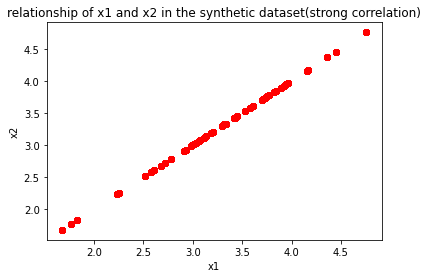

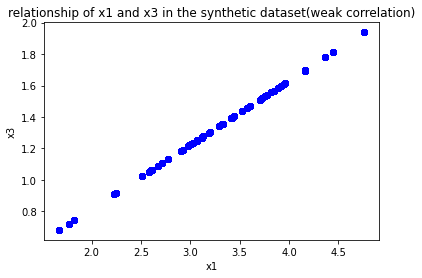

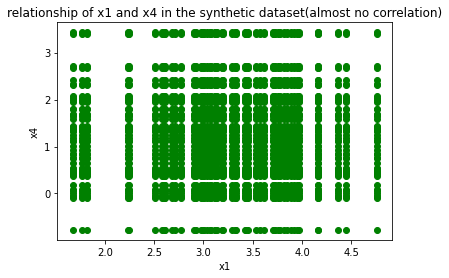

In [60]:
# to test how the number of new features influences the result

# use PCA to generate a synthetic dataset with 2 new features

# get eigenvalues and eigenvectors
l, v = np.linalg.eig(conv)

# calculate the largest three eigenvalues and transformation matrix
max_index = np.argpartition(l,-2)[-2:]
matrix = np.zeros((4,2))
for i in range(1,-1,-1):
    matrix[:,1-i] = v[:,max_index[i]]

# calculate new mean and variance
nmean = np.dot(mean, matrix)
var = np.zeros(4)
for i in range(0,4):
    var[i]=conv[i,i]
nvar = np.dot(var, matrix*matrix)
k = np.sqrt(nvar)

# sample for the new features
s0 = np.random.normal(nmean[0], k[0], 50)
s1 = np.random.normal(nmean[1], k[1], 50)

# make Cartesian production
A = list(itertools.product(s0,s1))

# convert them back
syn = np.dot(A, matrix.T)

# plot the synthetic dataset
plt.plot(syn[:,0], syn[:,1], 'ro')
plt.title("relationship of x1 and x2 in the synthetic dataset(strong correlation)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
plt.plot(syn[:,0], syn[:,2], 'bo')
plt.title("relationship of x1 and x3 in the synthetic dataset(weak correlation)")
plt.xlabel("x1")
plt.ylabel("x3")
plt.show()
plt.plot(syn[:,0], syn[:,3], 'go')
plt.title("relationship of x1 and x4 in the synthetic dataset(almost no correlation)")
plt.xlabel("x1")
plt.ylabel("x4")
plt.show()

# shows that too little of new features can lead to missing information